In [2]:
import pandas as pd
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML

# All previous training

In [3]:
dir_path = "../../results/dynamic_clf_all_previous_training"

results without graph features

In [4]:
df_normal = pd.read_csv(f"{dir_path}/dynamic_clf_normal_all_previous_in_training.csv")
df_normal.rename( columns={'Unnamed: 0':'batch_num'}, inplace=True )
df_ros = pd.read_csv(f"{dir_path}/dynamic_clf_ros_all_previous_in_training.csv")
df_ros.rename( columns={'Unnamed: 0':'batch_num'}, inplace=True )
df_smote = pd.read_csv(f"{dir_path}/dynamic_clf_smote_all_previous_in_training.csv")
df_smote.rename( columns={'Unnamed: 0':'batch_num'}, inplace=True )

Results with graph features

In [5]:
df_normal_extra = pd.read_csv(f"{dir_path}/dynamic_clf_normal_extra_feature_all_previous_in_training.csv")
df_normal_extra.rename( columns={'Unnamed: 0':'batch_num'}, inplace=True )
df_ros_extra = pd.read_csv(f"{dir_path}/dynamic_clf_ros_extra_feature_all_previous_in_training.csv")
df_ros_extra.rename( columns={'Unnamed: 0':'batch_num'}, inplace=True )
df_smote_extra = pd.read_csv(f"{dir_path}/dynamic_clf_smote_extra_feature_all_previous_in_training.csv")
df_smote_extra.rename( columns={'Unnamed: 0':'batch_num'}, inplace=True )

In [6]:
df_normal.columns

Index(['batch_num', 'period', 'Accuracy', 'Precision', 'Recall', 'F-1', 'TN',
       'FP', 'FN', 'TP'],
      dtype='object')

Compare Recall over the time

In [7]:
def plot(df_simple,df_extra,metric:str):
    simple = df_simple[["batch_num",metric]]
    simple["type"] = "simple"
    extra = df_extra[["batch_num",metric]]
    extra["type"] = "graph_features"
    merged_recall_df = pd.concat([simple,extra])
    sns.catplot(x='batch_num', y=metric, hue='type', data=merged_recall_df, kind='bar')


In [8]:
def calculate_metrics(df,clf:str):
    TP = df["TP"].sum()
    TN = df["TN"].sum()
    FN = df["FN"].sum()
    FP = df["FP"].sum()
    metrics = {}
    metrics["Precision"] = TP/(TP+FP)
    metrics["Recall"] = TP/(TP+FN)
    metrics["F1"] = (metrics["Precision"]*metrics["Recall"]*2)/(metrics["Precision"]+metrics["Recall"])
    metrics["Classifier"] = clf
    return metrics

/tmp/ipykernel_4147200/1375816511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple["type"] = "simple"
/tmp/ipykernel_4147200/1375816511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extra["type"] = "graph_features"
/tmp/ipykernel_4147200/1375816511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

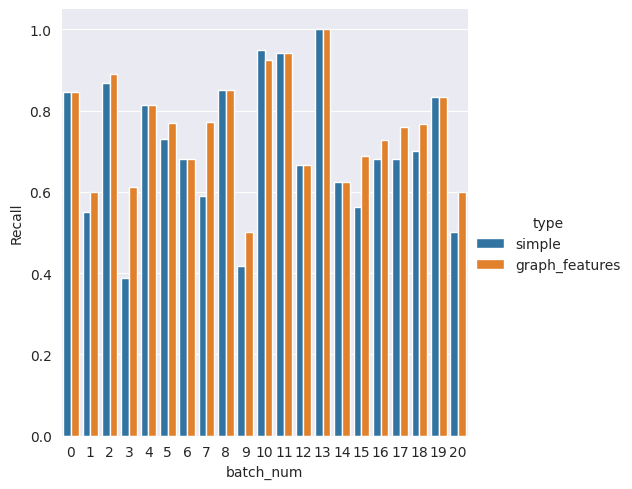

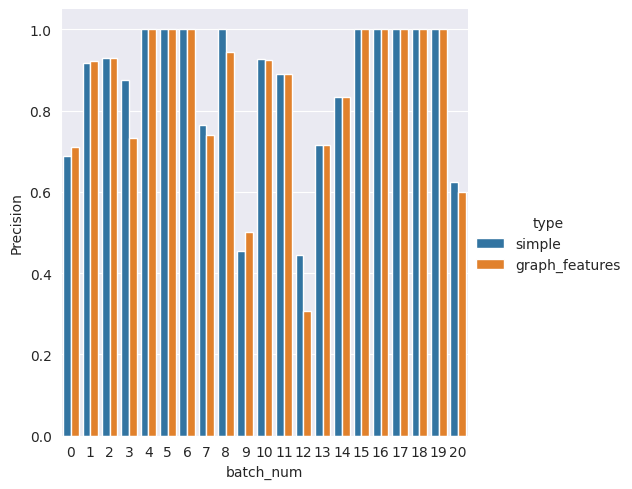

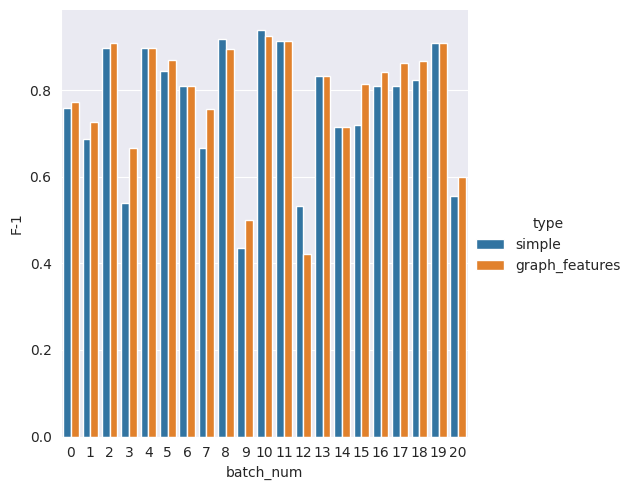

In [9]:
plot(df_normal,df_normal_extra,"Recall")
plot(df_normal,df_normal_extra,"Precision")
plot(df_normal,df_normal_extra,"F-1")

/tmp/ipykernel_4147200/1375816511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple["type"] = "simple"
/tmp/ipykernel_4147200/1375816511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extra["type"] = "graph_features"
/tmp/ipykernel_4147200/1375816511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

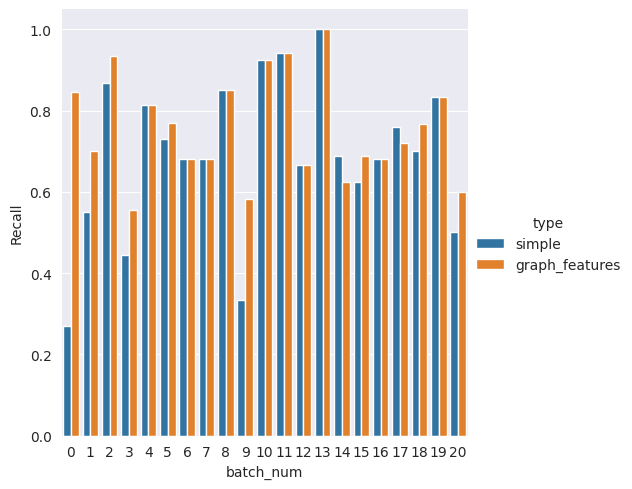

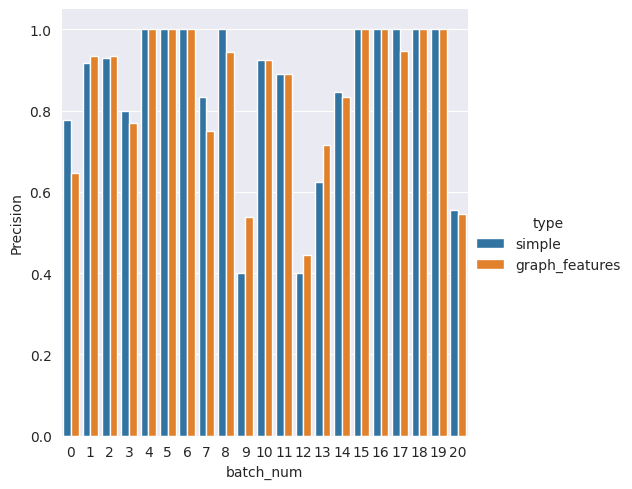

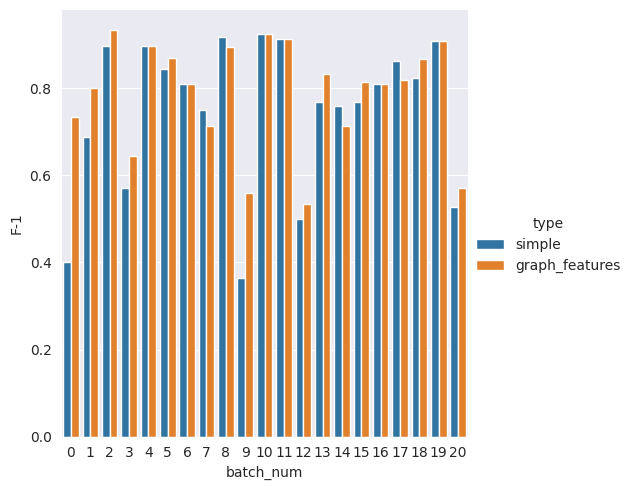

In [10]:
plot(df_ros, df_ros_extra, "Recall")
plot(df_ros, df_ros_extra, "Precision")
plot(df_ros, df_ros_extra, "F-1")

/tmp/ipykernel_4147200/1375816511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple["type"] = "simple"
/tmp/ipykernel_4147200/1375816511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extra["type"] = "graph_features"
/tmp/ipykernel_4147200/1375816511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

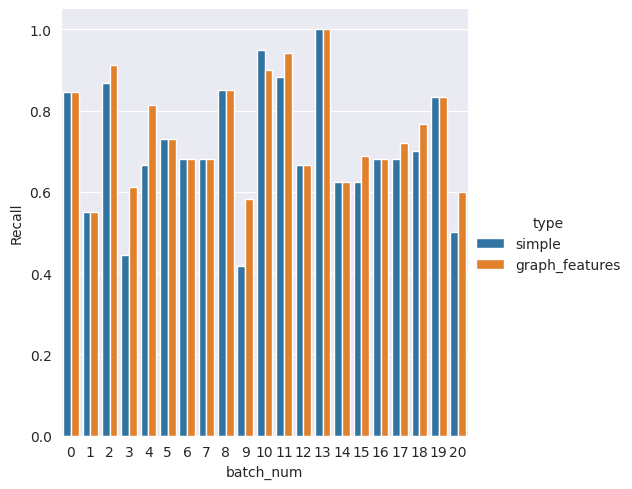

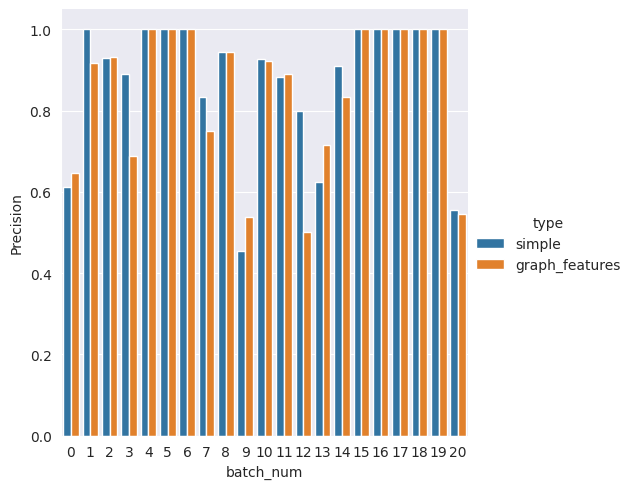

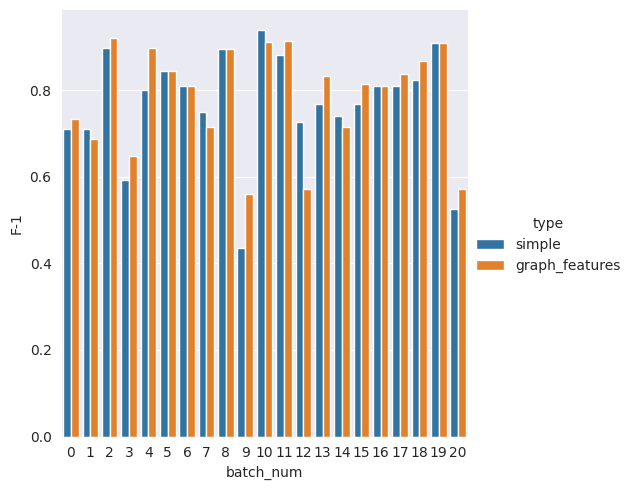

In [11]:
plot(df_smote, df_smote_extra, "Recall")
plot(df_smote, df_smote_extra, "Precision")
plot(df_smote, df_smote_extra, "F-1")

## Overall metrics
![](../../../../../accuracy.png)



In [92]:
metrics_df = pd.DataFrame(columns=["Classifier","Precision","Recall","F1"])
metrics_df = metrics_df.append(calculate_metrics(df_normal,"normal"),ignore_index=True)
metrics_df = metrics_df.append(calculate_metrics(df_normal_extra,"normal_graph_feature"),ignore_index=True)
metrics_df = metrics_df.append(calculate_metrics(df_ros,"ROS"),ignore_index=True)
metrics_df = metrics_df.append(calculate_metrics(df_ros_extra,"ROS_graph_feature"),ignore_index=True)
metrics_df = metrics_df.append(calculate_metrics(df_smote,"SMOTE"),ignore_index=True)
metrics_df = metrics_df.append(calculate_metrics(df_smote_extra,"SMOTE_graph_feature"),ignore_index=True)
metrics_df


/tmp/ipykernel_2764285/2685047509.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(calculate_metrics(df_normal,"normal"),ignore_index=True)
/tmp/ipykernel_2764285/2685047509.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(calculate_metrics(df_normal_extra,"normal_graph_feature"),ignore_index=True)
/tmp/ipykernel_2764285/2685047509.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(calculate_metrics(df_ros,"ROS"),ignore_index=True)
/tmp/ipykernel_2764285/2685047509.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_d

,Classifier,Precision,Recall,F1
0,normal,0.883978,0.732265,0.801001
1,normal_graph_feature,0.867008,0.775744,0.818841
2,ROS,0.893372,0.709382,0.790816
3,ROS_graph_feature,0.869231,0.775744,0.819831
4,SMOTE,0.883657,0.729977,0.799499
5,SMOTE_graph_feature,0.867532,0.764302,0.812652


In [89]:
calculate_metrics(df_smote_extra,"SMOTE_graph_feature")

{'Precision': 0.8839779005524862,
 'Recall': 0.7322654462242563,
 'F1': 0.8010012515644557,
 'Classifier': 'SMOTE_graph_feature'}

In [90]:
calculate_metrics(df_normal_extra,"normal_graph_feature")

{'Precision': 0.8839779005524862,
 'Recall': 0.7322654462242563,
 'F1': 0.8010012515644557,
 'Classifier': 'normal_graph_feature'}